In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Сохраним данные из файла в датафрейме при помощи функции read_csv.
# Обратите внимание, что первая колонка (ID) используется в качестве индекса для записей

data = pd.read_csv("glass.data", delimiter=",", index_col=0)
data.columns = ["Refractive_index", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class"]

print(data.head(10))
print(data.shape)

    Refractive_index     Na    Mg    Al     Si     K    Ca   Ba    Fe  class
1                                                                           
2            1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00      1
3            1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00      1
4            1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00      1
5            1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00      1
6            1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26      1
7            1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00      1
8            1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00      1
9            1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00      1
10           1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11      1
11           1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24      1
(213, 10)


Представленный набор данных содержит информацию об образцах стекла. Объекты в наборе данных разделены на 6 типов:
строительное термпополированное стекло,
строительное обычное стекло,
автомобильное термополированное стекло,
автомобильное обычное стекло,
столовая посуда,
фары.

Набор используется для определения типа стекла на основании процента содержания в нем различных видов оксидов.



Для того, чтобы получить информацию о типах данных в каждой колонке и количестве записей, а также о количестве пропущенных записей, воспользуемся методом DataFrame.info()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                213 non-null    int64  
 1   Refractive_index  213 non-null    float64
 2   Na                213 non-null    float64
 3   Mg                213 non-null    float64
 4   Al                213 non-null    float64
 5   Si                213 non-null    float64
 6   K                 213 non-null    float64
 7   Ca                213 non-null    float64
 8   Ba                213 non-null    float64
 9   Fe                213 non-null    float64
 10  class             213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


Теперь, получим минимальную статическую информацию о признаках, например минимальные и максимальные значения, среднее отклонение и т.д. Для этого можно использовать метод DataFrame.describe()

In [26]:
data.describe()

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


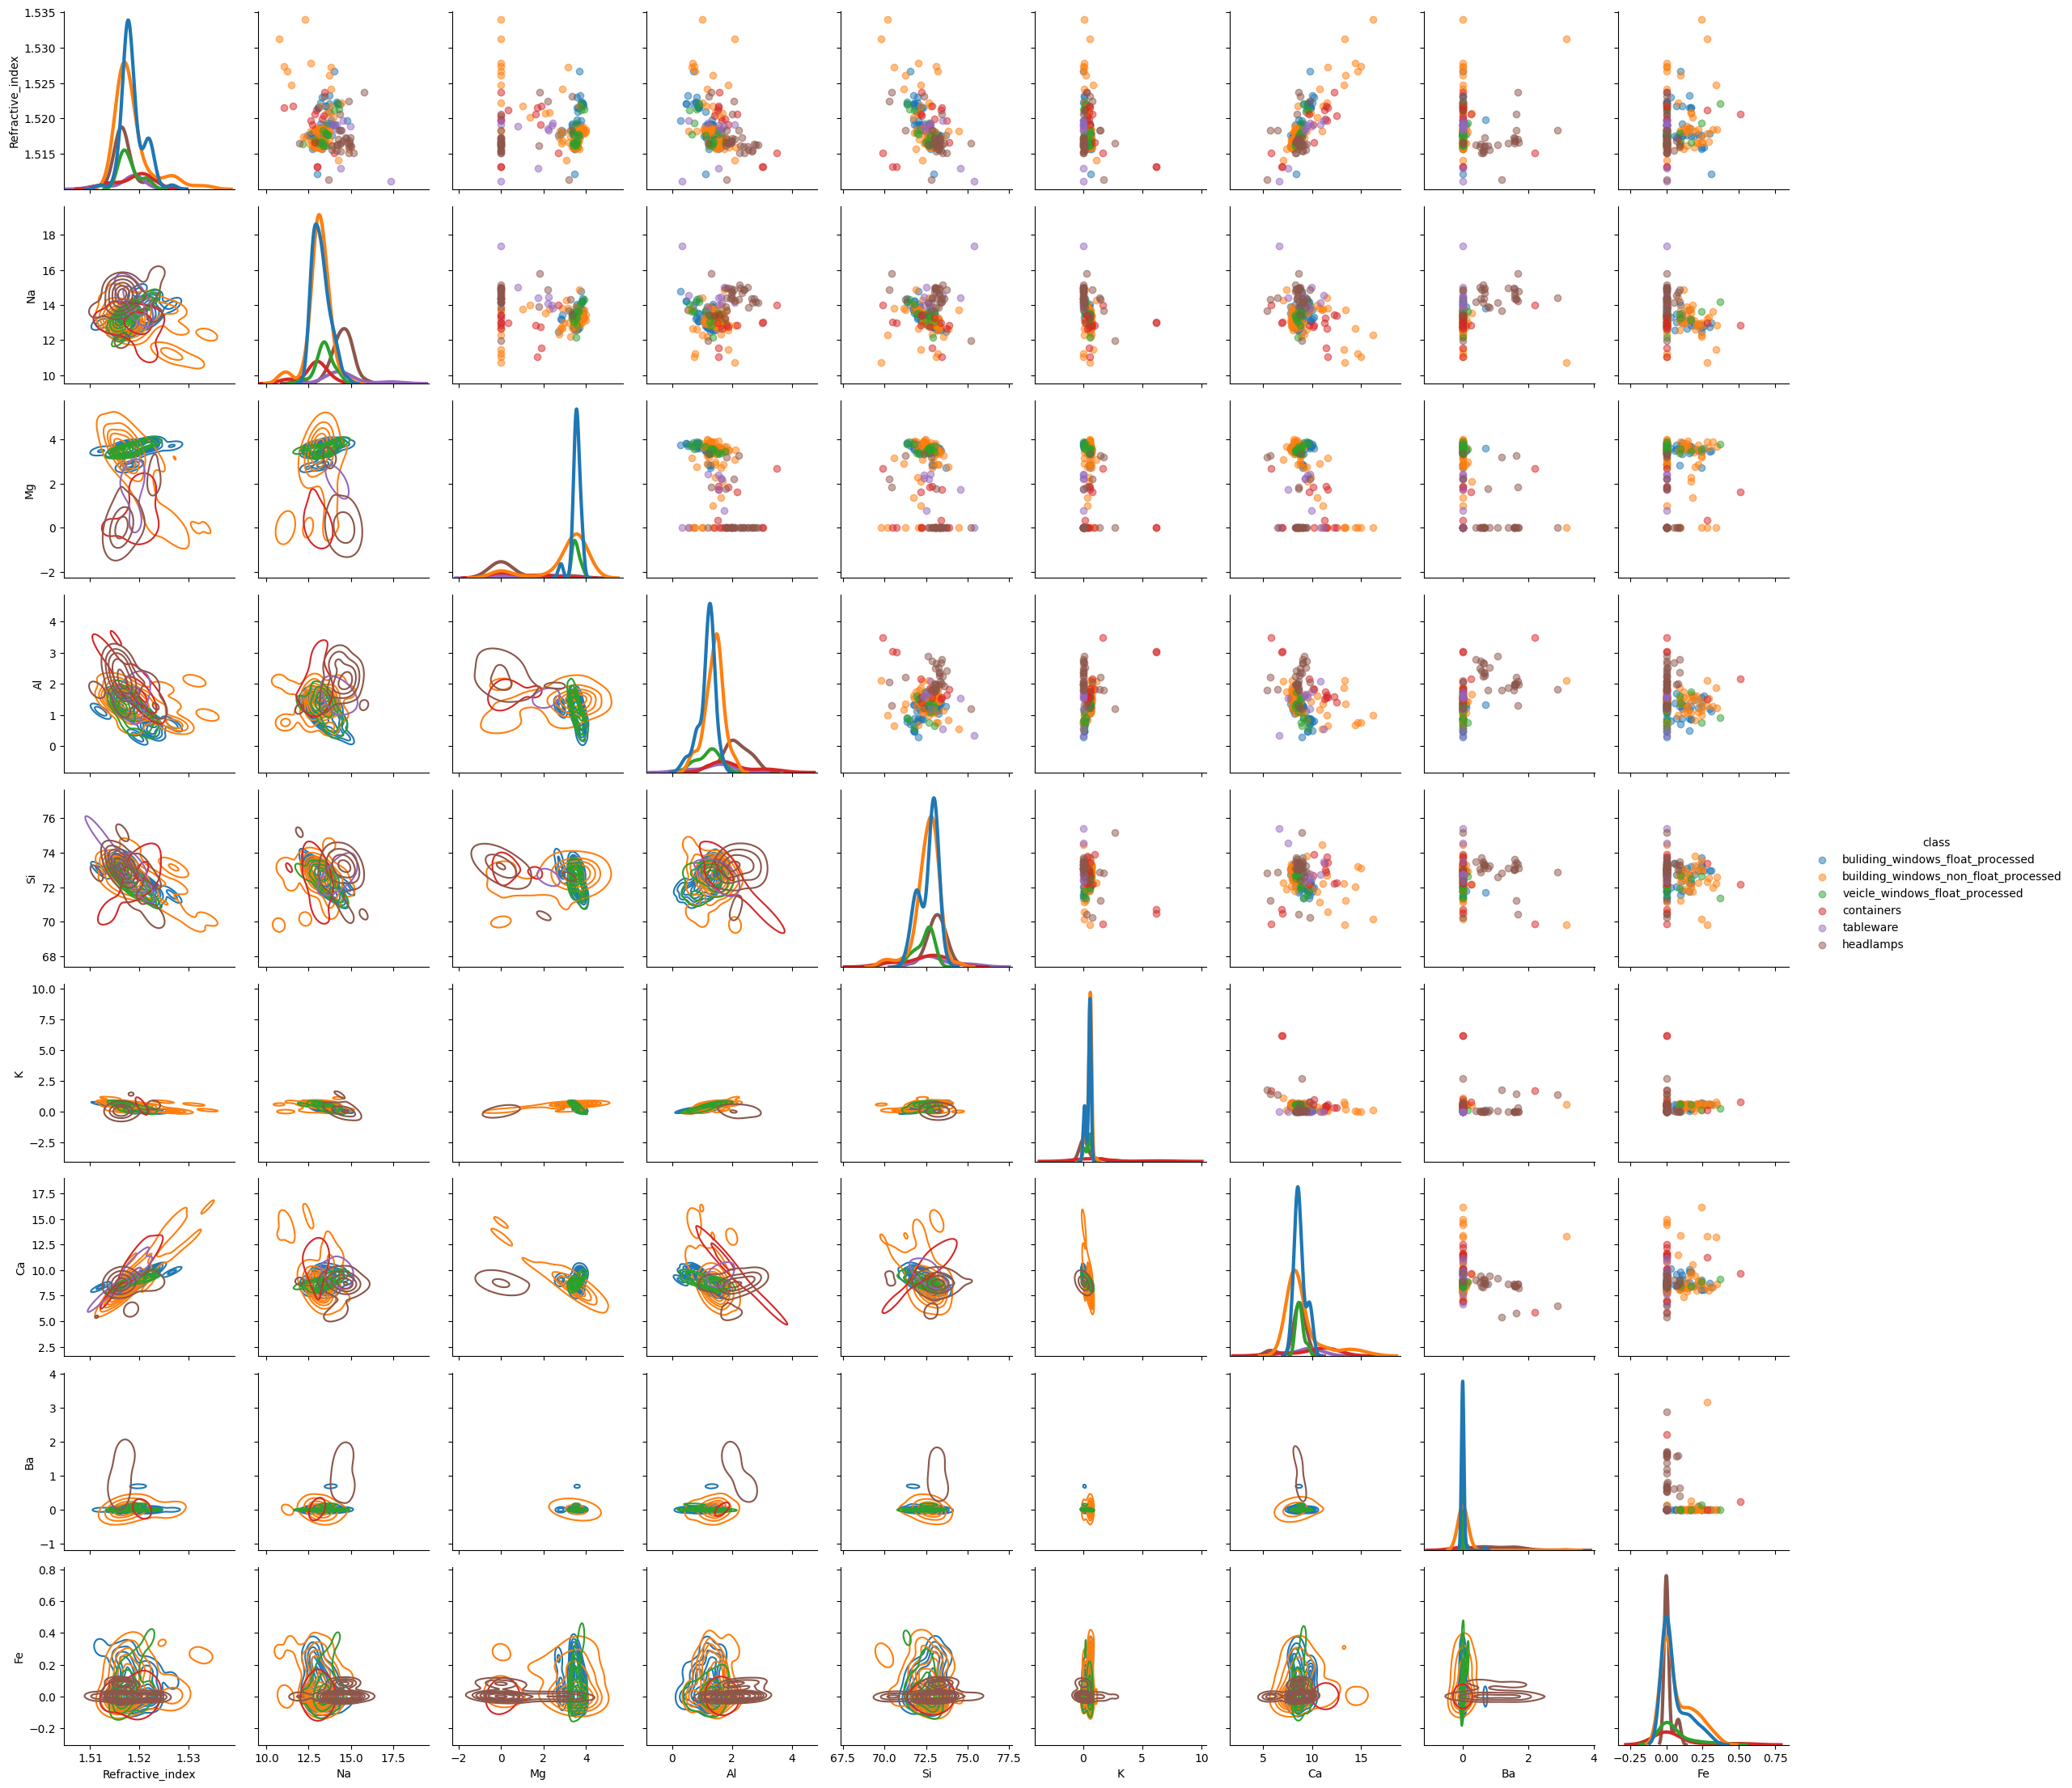

In [23]:
g = sns.PairGrid(df, diag_sharey=False, hue="class")
g.map_lower(sns.kdeplot, warn_singular=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3);
g.add_legend()

**Контрольные вопросы**
# 1. Какие инструментальные средства используются для организации рабочего места специалиста Data Science?

К инструментальным средствам специалиста Data Science можно отнести:

1.   Средства для программирования и анализа данных

     К таким средствам можно отнести языки программирования и IDE. К наиболее популярным языкам для машинного обучения относятся Python и R. В качестве интегрированнных сред разработки для анализа данных чаще всего используется Jupiter Notebook или его аналоги за счет интерактивного доступа к данным и возможностям их визуализации.
2.   Библиотеки и фреймворки
     
     Для такой специфичной задачи как анализе данных стандартных возможностей языков программирования часто оказывается недостаточно. Поэтому еще одним важным инструментальным средством являются библиотеки и фреймворки, направленные на обработку данных (Pandas, Numpy), машинное обучение (scikit-learn, TensorFlow, PyTorch) и визуализацию данных (Matplotlib, Seaborn, Plotpy).

3. Инструменты для хранения и обработки данных

     Для хранения и управления данными, использующимися в ходе обучения, необходимо использование баз данных (PostgreSql, MongoDB, Cassandra) или облачных хранилищ (AWS, Microsoft Azure, Apache Hadoop, Spark).

4. Средства управления проектами и контроля версий

     Для организации процесса внедрения моделей в прикладные решения используются инструменты для контроля версий (GitHub/GitLab) и контейнеризаторы (Docker, Jenkins)

5. Средства для автоматизации и разверытвания моделей

  После создания моделей, они нуждаются в развертывании на определенной платформе для их экспуатации и возможности контроля. К таким интрументам относятся MLFlow (отслеживание развертывания и управления экспериментами), KubeFlow (развертывание моделей в Kubernetes), AirFlow (автоматизации оркестрации процессов работы с данными).

# 2. Какие библиотеки Python используются для работы в области машинного обучения? Дайте характеристику каждой библиотеке.



1.   Numpy - используется для работы с таблицами и многомерными данными, а также хорошо подходит для работы с большими объемами данных. Является основой для многих других библиотек и инструментов, используемых в машинном обучениии.
2.   Matplotlib - пакет для визуализации данных, позволяет создавать графики и редактировать отдельные фигуры на нем.
3.   TensorFlow - используется для создания, обучения и развертывания моделей машинного обучения и глубокого обучения. Эта библиотека является одной из самых популярных платформ для работы с нейронными сетями и сложными вычислительными задачами.
4. Pandas - библиотека, служащая для обработки и анализа данных. Позволяет производить очистку и моделирование данных без переключения на более специфичные для статообработки языки (такие как R и Octave). Также, библиоетка предоставляет широкие возможности для обмена данными между различными типами и переформатирование наборов данных.
5. PyTorch - библиотека для машинного обучения в Python. Специализируется на создании моделей глубокого обучения, в частности задачах компьютерного зрения, обработки естественного языка и генерации текста и изображений. Имеет открытый исходный код.

# 3. Почему при реализации систем машинного обучения наиболее широкое распространение получили библиотеки Python?

Библиотеки Python получили широкое распространение в сфере задач машинного обучения по рядку причин:



1.   Простота и читабельность кода. Простая синтаксическая структура языка python позволяет специалистам Data Science сосредоточиться на решении задач машинного обучения, а не на синтаксических особенностях языка, что особенно важно в исследовательской среде
2.   Большое количество библиотек и инструментов. Python имеет огромную экосистему специализированных библиотек для различных этапов для работы с данными и машинного обучения. Это позволяет разработчикам решать любые задачи без необходимости реализации новых инструментов.
3.   Кроссплатформенность и простота интеграции. Python работает на различных платформах (Windows, Linux, macOS), что упрощает развертывание моделей машинного обучения на разных устройствах и в облачных системах. Также Python легко интегрируется с C++ и Java, что делает его хорошим выбором для гибридным систем, где требуется высокая производительность.
4.  Широкая поддержка паралельных вычислений и работы с GPU. Python библиоетки поддерживают распределенные вычисления и использование графических процессоров, что имеет большое значение для ускорения сложных моделей глубокого обучения.




